## Getting Started

#### Instructions: Run the cell below to import the necessary libraries. Links to official package documentation are provided.

In [2]:
# General imports
import math
import sys

# Data science imports
import pandas as pd # pandas documentation: 
import numpy as np # numpy documentation:

# ML imports
import sklearn # sk learn documentation:
from sklearn import neighbors, tree, svm, linear_model    # Main ML models

# Graphical imports
from PIL import Image
from matplotlib import pyplot as plt # matplotlib documentation:

# Configuration
np.set_printoptions(threshold=sys.maxsize, linewidth=500)

#### Instructions: Use the pandas documentation to read about the operation of the `read_csv` function. Use this function to read in the data file from `/data/digits.csv`. The `read_csv` function returns a `DataFrame` object. A data frame is essentially a mini spreadsheet table. Save this data frame in a variable. Starter code for this task is provided below. Hint, use the proved `col_names` variable as column names for the `DataFrame`.

In [60]:
# digits_data_train = pd.read_csv(...)
# digits_data_test = pd.read_csv(...)
col_names = ["pixel " + str(i) for i in range(64)] + ["true digit"]


digits_train = pd.read_csv("../data/digits_train.csv",names = col_names)
digits_test = pd.read_csv("../data/digits_test.csv",names=col_names)

digits_train

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,true digit
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


#### Instructions: Call the Python `print` function on our data frames

In [53]:
### Print data frame here
digits_test

,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
4,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1792,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1793,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1794,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


Before moving onto data preparation, consider what each row represents in the data frame. What does each column represent? Hint: read the dataset description [here](website.com)

=== Array representation of handwritten digit ===
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

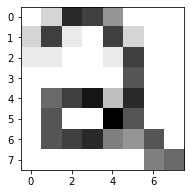

In [49]:
def process_human_example(image_file_path, verbose = True):
    newArr = np.zeros(shape=(32,32))
    img = Image.open(image_file_path).convert('RGBA')
    arr = np.array(img)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j, 3] == 255: 
                newArr[i, j] = 1
    
    if verbose:
        print("=== Array representation of handwritten digit ===")       
        print(newArr)
        print()

    
    finalArr = np.zeros(shape=(8, 8))
    for i in range(32):
        for j in range(32):
            finalArr[i//4, j//4] += newArr[i, j]
    
    if verbose:
        print("=== Compressed array representation of handwritten digit ===")
        print(finalArr)
        print()
        print("=== Graphical pseudo-greyscale representation of image ===")
        plt.figure(1, figsize=(3, 3))
        plt.imshow(finalArr, cmap=plt.cm.gray_r, interpolation="nearest")
        plt.show()
    
    return finalArr

novel_query = process_human_example("../images/Handwritten_2.png")

## Data Preparation

Let's remember the data we're given. We are given both **feature values** (here, image information) and **labels** (here, the value of the handwritten digit). In the data frame we initialized, all of this information is packaged together. We need to separate the feature values into one data frame (typically denoted ` <dataset name>_X`) and the labels (or **targets**) into another (typically denoted `<dataset name>_y`). To accomplish this, we can use the `pop` function (from the `pandas` library) to "pop off" the labels column of the data frame. Using `pandas` documentation as a guide, 